In [16]:
# Imports needed in every section
import pandas as pd
#import testing_scripts.constants as constants
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, confusion_matrix

#Read Data
folder_name = "../sample_input_data/supplementary_materials_output_data/"

doordash_table1_df = pd.read_csv("../Table1_Experimental_Modified_Resumes/Scores/DoorDashPMScores.csv")
doordash100 = pd.read_csv("../Figure1_100Samples/Scores/doordash_job_description.csv")

google_table1_df = pd.read_csv("../Table1_Experimental_Modified_Resumes/Scores/GoogleUX_Scores.csv")
google100 = pd.read_csv("../Figure1_100Samples/Scores/google_ux_job_description.csv")


## Motivating Figures (Section 3)

### Figure 1-A (Resume Scores Across Sequential LLM Manipulations)

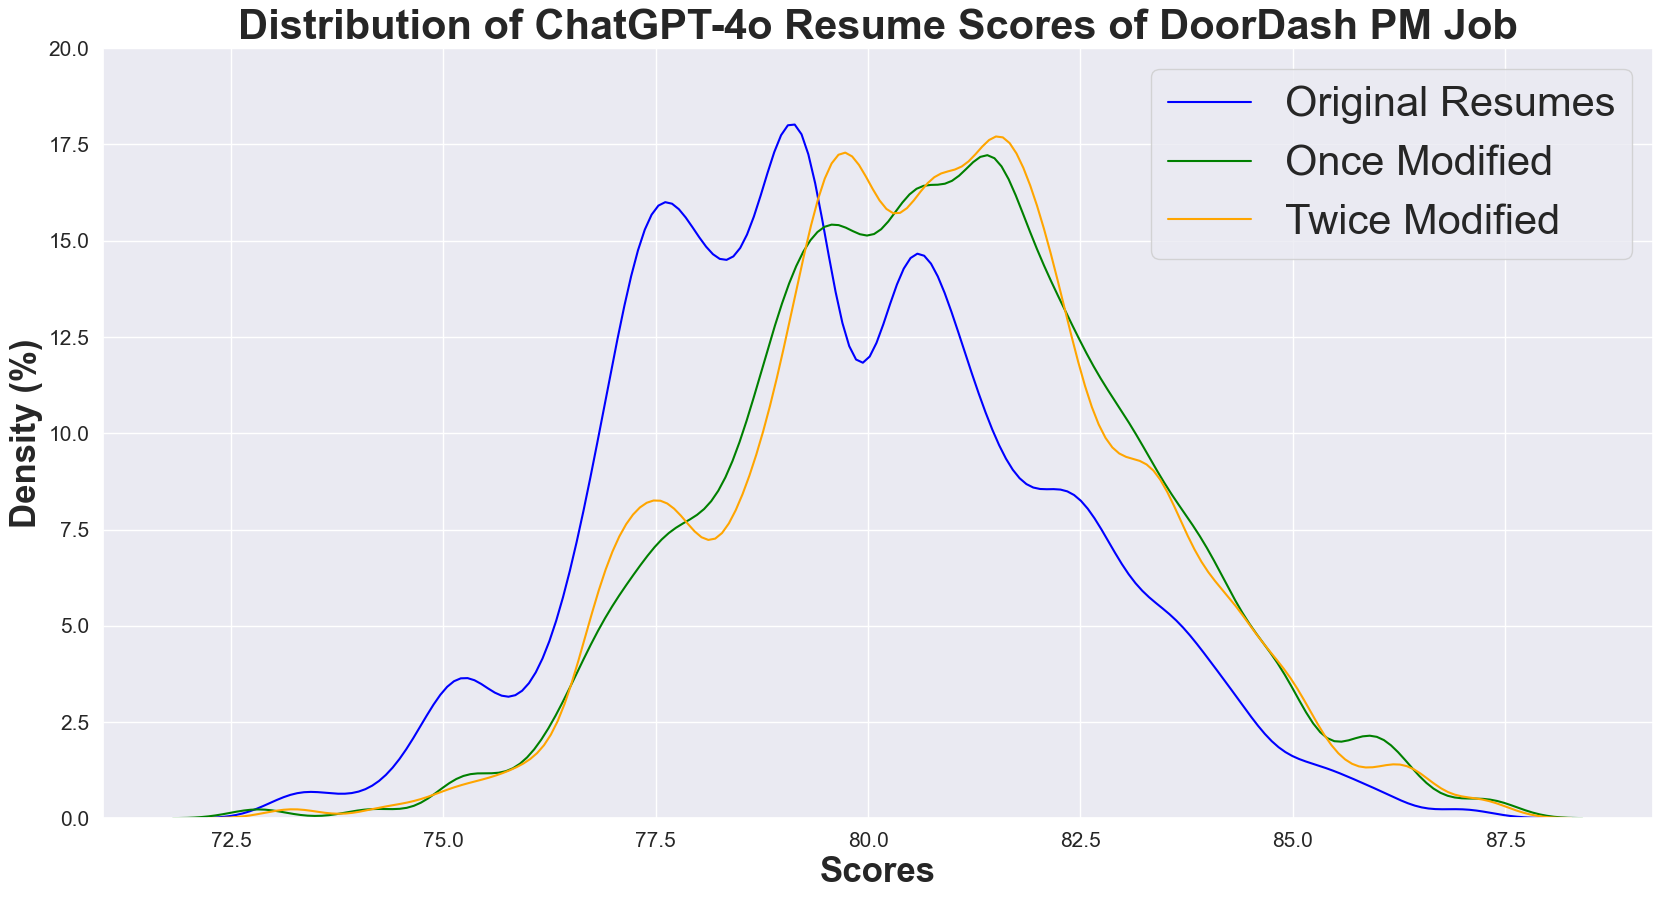

In [17]:
sns.set_theme(rc={'figure.figsize':(20,10)})
first_three_colors = ['blue', 'green', 'orange']

fig = sns.kdeplot(doordash_table1_df['CVDoorDash PM Score'], bw_adjust=0.5, color=first_three_colors[0])  # bw_adjust adjusts the smoothness
fig = sns.kdeplot(doordash_table1_df['Cleaned GPT-4o Conversation-Improved CVDoorDash PM Score'], bw_adjust=0.5, color=first_three_colors[1])
fig = sns.kdeplot(doordash_table1_df['Cleaned Twice GPT-4o Conversation-Improved CVDoorDash PM Score'], bw_adjust=0.5, color=first_three_colors[2])
plt.title('Distribution of ChatGPT-4o Resume Scores of DoorDash PM Job', fontsize=30, fontweight="bold")
plt.yticks(fig.get_yticks(), np.round(fig.get_yticks() * 100, 2))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Scores', fontsize=25, fontweight="bold")
plt.ylabel('Density (%)', fontsize=25, fontweight="bold")
plt.legend(['Original Resumes', 'Once Modified', 'Twice Modified'], fontsize=30)
#plt.grid()
plt.savefig('chatgpt1.png')
plt.show()

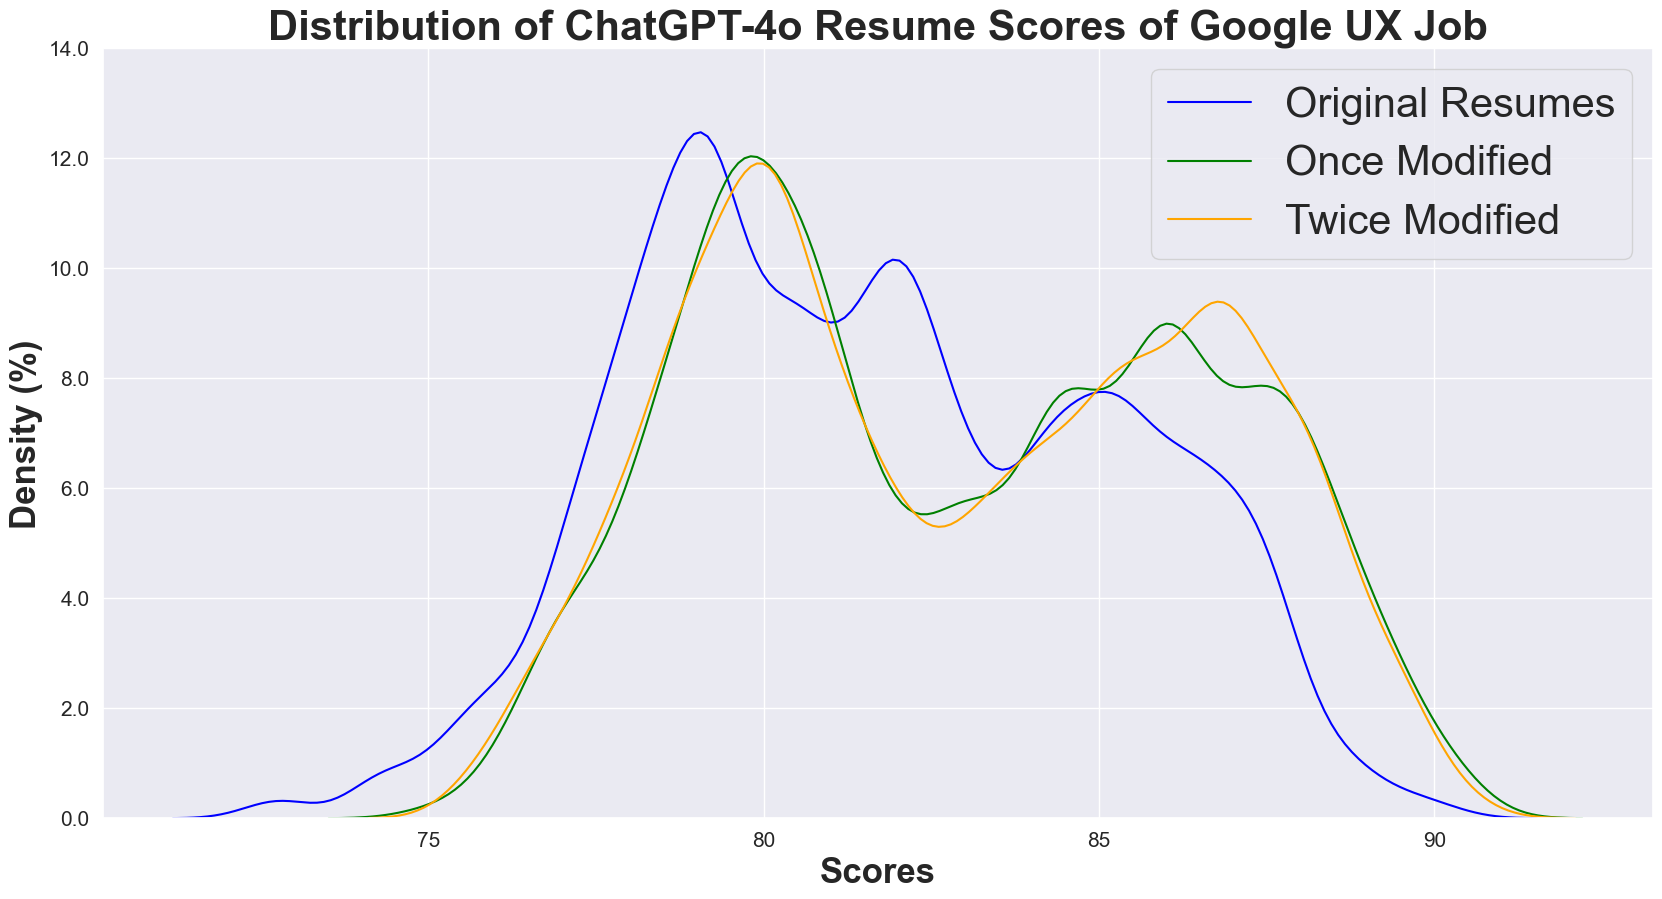

In [21]:
sns.set_theme(rc={'figure.figsize':(20,10)})
first_three_colors = ['blue', 'green', 'orange']

fig = sns.kdeplot(google_table1_df['CVGoogle_UX Score'], bw_adjust=0.5, color=first_three_colors[0])  # bw_adjust adjusts the smoothness
fig = sns.kdeplot(google_table1_df['Cleaned GPT-4o Conversation-Improved CVGoogle_UX Score'], bw_adjust=0.5, color=first_three_colors[1])
fig = sns.kdeplot(google_table1_df['Twice GPT-4o Google_UX Score'], bw_adjust=0.5, color=first_three_colors[2])
plt.title('Distribution of ChatGPT-4o Resume Scores of Google UX Job', fontsize=30, fontweight="bold")
plt.yticks(fig.get_yticks(), np.round(fig.get_yticks() * 100, 2))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Scores', fontsize=25, fontweight="bold")
plt.ylabel('Density (%)', fontsize=25, fontweight="bold")
plt.legend(['Original Resumes', 'Once Modified', 'Twice Modified'], fontsize=30)
#plt.grid()
plt.savefig('chatgpt1.png')
plt.show()

### Figure 1-B (Resume Scores over Different LLM Manipulations)

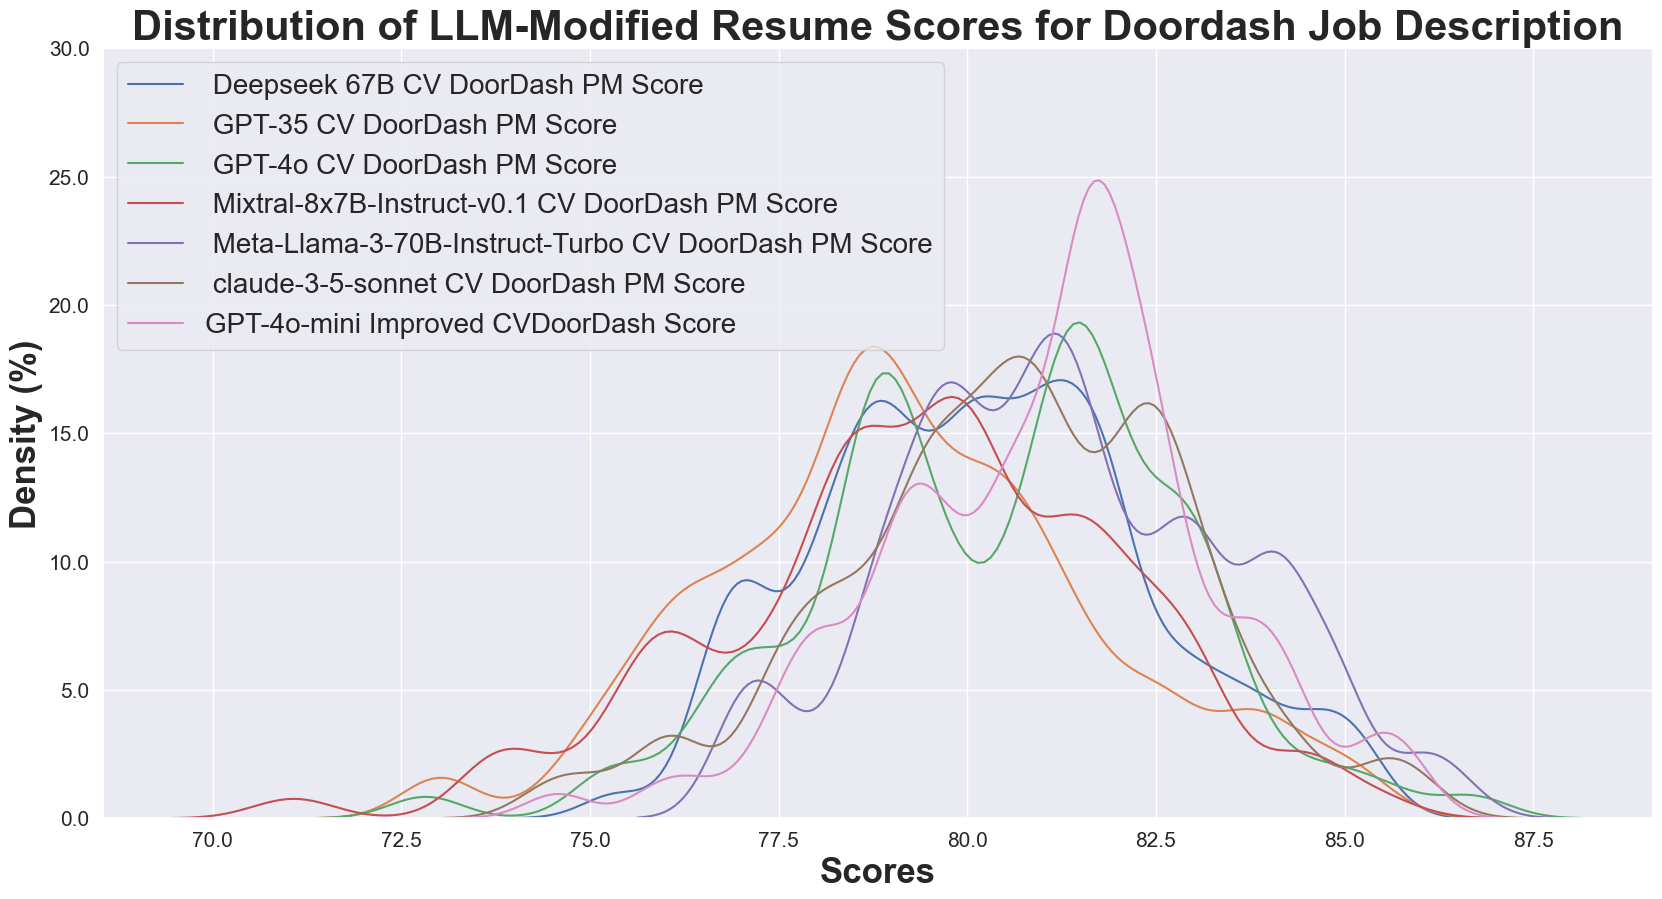

In [15]:
leg = []
for i in doordash100.columns:
    if 'Score' in i and 'Twice' not in i:
        fig = sns.kdeplot(doordash100[i], bw_adjust=0.5)
        leg.append(i.replace(' Conversation-Improved', ''))

plt.yticks(fig.get_yticks(), np.round(fig.get_yticks() * 100, 2))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Scores', fontsize=25, fontweight="bold")
plt.ylabel('Density (%)', fontsize=25, fontweight="bold")
plt.title('Distribution of LLM-Modified Resume Scores for Doordash Job Description', fontsize=30,fontweight="bold")
plt.legend(leg, fontsize=20)
plt.show()

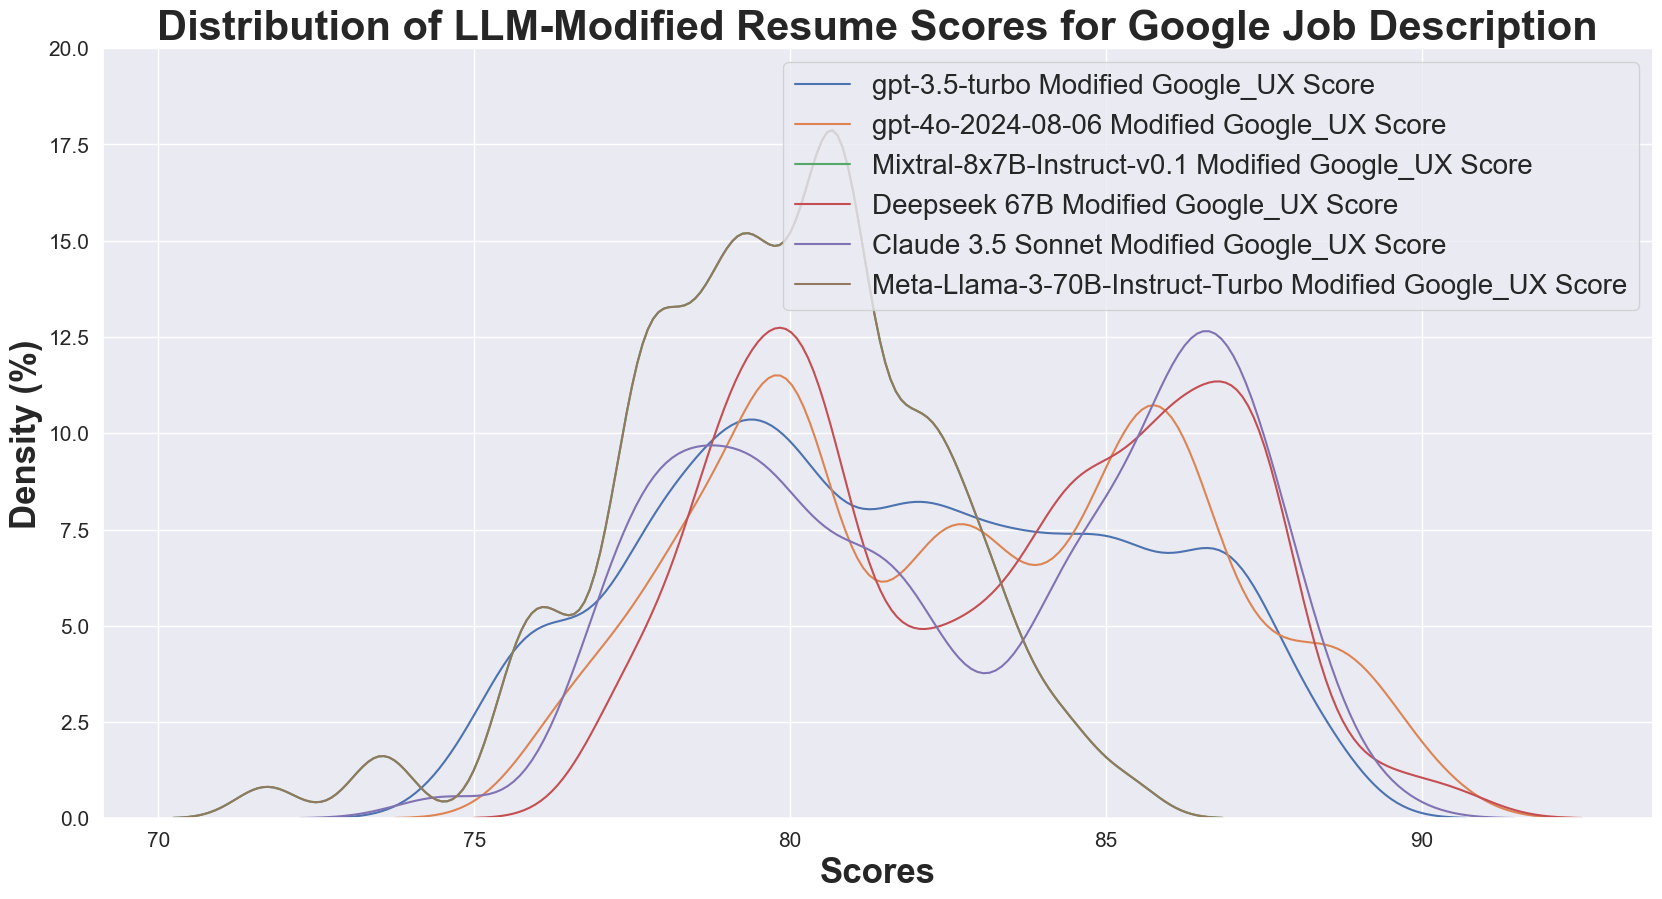

In [22]:
leg = []
for i in google100.columns:
    if 'Score' in i and 'Twice' not in i:
        fig = sns.kdeplot(google100[i], bw_adjust=0.5)
        leg.append(i.replace(' Conversation-Improved', ''))

plt.yticks(fig.get_yticks(), np.round(fig.get_yticks() * 100, 2))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Scores', fontsize=25, fontweight="bold")
plt.ylabel('Density (%)', fontsize=25, fontweight="bold")
plt.title('Distribution of LLM-Modified Resume Scores for Google Job Description', fontsize=30,fontweight="bold")
plt.legend(leg, fontsize=20)
plt.show()

## Experimental Results with Binary Classification(See Section 8 of Paper)

In [30]:
'''
The following functions replicates how original resume scores are mapped to applicant reported 
and hirer inputted scores according to our traditional and two-ticket hiriing schemes, respectively.
'''

# Function that takes in choice amongst original & modified resume scores, and reports Applicant submitted scores. 
# These inputs are equivalent to the datapoints a traditional hiring system would consider.
groups_google = {
    0:'CVGoogle_UX Score',
    1:{
        'Input-A':'CVGoogle_UX Score',
        'Input-B':'Cleaned GPT-4o Conversation-Improved CVGoogle_UX Score',
        'Hirer-A':'Cleaned GPT-4o Conversation-Improved CVGoogle_UX Score',
        'Hirer-B': 'Twice GPT-4o Google_UX Score',
        },
    2:{
        'Input-A':'Modified GPT-3.5 Google_UX Score',
        'Input-B':'Cleaned GPT-4o Conversation-Improved CVGoogle_UX Score',
        'Hirer-A':'Modified GPT-4o of GPT-3.5-turbo Google_UX Score',
        'Hirer-B': 'Twice GPT-4o Google_UX Score',
    },
    3:{
        'Input-A':'Modified GPT-4o-mini Google_UX Score',
        'Input-B':'Cleaned GPT-4o Conversation-Improved CVGoogle_UX Score',
        'Hirer-A':'Modified GPT-4o of GPT-4o-mini Google_UX Score',
        'Hirer-B': 'Twice GPT-4o Google_UX Score',
    },
}
groups_doordash = {
    0:'CVDoorDash PM Score',
    1:{
        'Input-A':'CVDoorDash PM Score',
        'Input-B':'Cleaned GPT-4o Conversation-Improved CVDoorDash PM Score',
        'Hirer-A':'Cleaned GPT-4o Conversation-Improved CVDoorDash PM Score',
        'Hirer-B': 'Cleaned Twice GPT-4o Conversation-Improved CVDoorDash PM Score',
        },
    2:{
        'Input-A':'GPT-3.5 Improved CVDoorDash PM Score',
        'Input-B':'Cleaned GPT-4o Conversation-Improved CVDoorDash PM Score',
        'Hirer-A':'GPT-4o Conversation Improved on GPT-3.5 Improved CVDoorDash PM Score',
        'Hirer-B': 'Cleaned Twice GPT-4o Conversation-Improved CVDoorDash PM Score',
    },
    3:{
        'Input-A':'GPT-4o-mini Improved CVDoorDash PM Score',
        'Input-B':'Cleaned GPT-4o Conversation-Improved CVDoorDash PM Score',
        'Hirer-A':'GPT-4o Conversation Improved on GPT-4o-mini Improved CVDoorDash PM Score',
        'Hirer-B': 'Cleaned Twice GPT-4o Conversation-Improved CVDoorDash PM Score',
    },
}

true_label = 'True Label'
def map_input_score(row, group, groupss):
    if row['Will Manipulate']:
        #If applicant is manipulating, will report better performing score amongst original and modified resume.
        return max(row[groupss[group]['Input-B']], row[groupss[0]])
    else:
        #If application is not manipulating, applicant can only report original score.
        return max(row[groupss[group]['Input-A']], row[groupss[0]])

# Function that takes in choice amongst original & modified resume scores, and reports Hirer inputted scores. Considers a modified version against the submitted resume.
def map_hirer_score(row, group, groupss):
    if row['Will Manipulate']:
        #If applicant has manipulated previously, take maximum of submitted score and 'twice' modified resume score.
        return max(row[groupss[group]['Input-B']], row[groupss[group]['Hirer-B']])
    else:
        #If applicant has not manipulated previously, take maximum of submitted score and 'once' modified resume score.
        return max(row[groupss[group]['Input-A']], row[groupss[group]['Hirer-A']])

In [31]:
#Group-No corresponds to an assigment of LLMs to P and U groups in our paper (See groups_doordash and groups_google more ref).DS_Store
groupno=3
df=doordash_table1_df
assigned_group_dict = groups_doordash
input_score_col = 'input_score_'+str(groupno)
hirer_score_col = 'hirer_score_'+str(groupno)
# Assuming your DataFrame is named 'df'
df[input_score_col] = df.apply(map_input_score, group=groupno, groupss = assigned_group_dict, axis=1)
df[hirer_score_col] = df.apply(map_hirer_score, group=groupno, groupss = assigned_group_dict, axis=1)
# Check statistics
df.groupby(true_label)[[input_score_col, hirer_score_col]].describe()

input_score_3                                                  \
                   count       mean       std     min       25%      50%   
True Label                                                                 
0                  260.0  80.035481  1.793416  74.035  78.88125  80.1335   
1                  260.0  82.057269  2.162083  75.369  80.68350  82.2555   

                             hirer_score_3                               \
                 75%     max         count       mean       std     min   
True Label                                                                
0           81.13200  86.701         260.0  80.078046  1.805725  75.838   
1           83.56475  86.998         260.0  82.152835  2.144652  75.369   

                                                
                 25%     50%       75%     max  
True Label                                      
0           78.90550  80.091  81.24775  86.701  
1           80.76575  82.299  83.73075  86.668

In [24]:
'''
The following Functions help us calculate optimal thresholds according to our "No False Positives Objective" on the training sets.
in each iteration of our sampling test to generate an estimate for the our TPR and disparity improvements across Traditional and "Two-Ticket" Hiring.
'''

#Function that calculates the threshold according to an approximation our 'no-False Positives" objective.
#In other words, we want to find a threshold that maximizes the TPR but sets the FPR arbitrarily small (not zero, but sufficiently close).
def set_threshold_min_fpr(scores, labels, min_tpr=0.01):
    # Ensure scores and labels are numpy arrays
    scores = np.array(scores)
    labels = np.array(labels)

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(labels, scores)

    # Find the index where TPR is just above min_tpr
    valid_idx = np.where(tpr >= min_tpr)[0]
    if len(valid_idx) > 0:
        best_idx = valid_idx[0]
        return thresholds[best_idx], fpr[best_idx], tpr[best_idx]
    else:
        # If no threshold gives TPR >= min_tpr, return the threshold with highest TPR
        best_idx = np.argmax(tpr)
        return thresholds[best_idx], fpr[best_idx], tpr[best_idx]

#Function that calculates the threshold according to an approximation our 'no-False Positives" objective.
#In other words, we want to find a threshold that maximizes the TPR but sets the FPR to zero.
def set_threshold_zero_fpr(scores, labels):
    # Ensure scores and labels are numpy arrays
    scores = np.array(scores)
    labels = np.array(labels)

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(labels, scores)
    #print(fpr, tpr, thresholds)
    # Find the index of the first non-zero false positive rate
    zero_fpr_index = np.argwhere(fpr > 0)[0][0] - 1

    # Get the threshold that gives zero false positive rate
    threshold = thresholds[zero_fpr_index]

    return threshold

In [25]:
""" The following functions help us calculate our neccesary metrics on the testing set: namely, the disparity, TPR, FNR, & Accuracy."""
def calculate_disparity(y_true, y_pred, y_manipulate_label):

    y_true_a = [y_true[i] for i in range(len(y_manipulate_label)) if y_manipulate_label[i]==True]
    y_pred_a = [y_pred[i] for i in range(len(y_manipulate_label)) if y_manipulate_label[i]==True]

    y_true_b = [y_true[i] for i in range(len(y_manipulate_label)) if y_manipulate_label[i]==False]
    y_pred_b = [y_pred[i] for i in range(len(y_manipulate_label)) if y_manipulate_label[i]==False]
    #print(np.mean(y_true_a), np.mean(y_true_b))
    #print(len(y_true_a), len(y_true_b))
    tn_a, fp_a, fn_a, tp_a = confusion_matrix(y_true_a, y_pred_a).ravel()
    tn_b, fp_b, fn_b, tp_b = confusion_matrix(y_true_b, y_pred_b).ravel()

    tpr_a = tp_a/(tp_a + fn_a)
    tpr_b = tp_b/(tp_b + fn_b)
    return tpr_a - tpr_b

def calculate_tpr_fnr_accuracy(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    tpr = tp / (tp + fn)
    fnr = fn / (fn + tp)
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    return tpr, fnr, accuracy

In [26]:
num_iter = 500
results = []

#Repeat our experiment num_iter times: each experiment has resamples a new train-test split.
for i in range(num_iter):

  #Conduct the train-test split.
  train_df = df.sample(frac=0.7, random_state=i)
  test_df = df.drop(train_df.index)

  ## Calculate Traditional-Threshold with One Ticket
  threshold, train_fpr, train_tpr = set_threshold_min_fpr(train_df[input_score_col], train_df[true_label])

  #Get Predictions of Traditional Classifier on Test Set from Above Threshold. 
  test_predictions_1ticket = [1 if score >= threshold else 0 for score in test_df[input_score_col]]
  test_labels = test_df[true_label].values
  test_manipulate_label = test_df['Will Manipulate'].values

  #Get Predictions of Two Ticket Classifier on Test Set from Above Threshold. 
  test_predictions_2ticket = [1 if score >= threshold else 0 for score in test_df[hirer_score_col]]
  test_labels = test_df[true_label].values

  # Calculate Metrics of Traditional Classifier on Test Set.
  test_tpr_1ticket, test_fnr_1ticket, test_accuracy_1ticket = calculate_tpr_fnr_accuracy(test_labels, test_predictions_1ticket)
  test_disparity_1_ticket = calculate_disparity(test_labels, test_predictions_1ticket, test_manipulate_label)
  #print(f"True Positive Rate on 1 ticket test set: {test_tpr_1ticket:.2f}")

  # Calculate Metrics of Two Ticket Classifier on Test Set.
  test_tpr_2ticket, test_fnr_2ticket, test_accuracy_2ticket = calculate_tpr_fnr_accuracy(test_labels, test_predictions_2ticket)
  test_disparity_2_ticket = calculate_disparity(test_labels, test_predictions_2ticket, test_manipulate_label)

  #Append Metrics of classifiers, per iteration to our final collected data.
  results.append({
    'test_accuracy_1ticket': test_accuracy_1ticket,
    'test_accuracy_2ticket': test_accuracy_2ticket,
    #Get the pairwise difference in accuracy between the two ticket and traditional classifier for each iteration (results in our paper's table).
    'test_accuracy_improvement': test_accuracy_2ticket-test_accuracy_1ticket,

    'test_tpr_1ticket': test_tpr_1ticket,
    'test_tpr_2ticket': test_tpr_2ticket,
    #Get the pairwise difference in TPR between the two ticket and traditional classifier for each iteration (results in our paper's table).
    'tpr_improvement':  test_tpr_2ticket-test_tpr_1ticket,

    'test_disparity_1ticket': test_disparity_1_ticket,
    'test_disparity_2_ticket': test_disparity_2_ticket,
    #Get the pairwise difference in disparity between the two ticket and traditional classifier for each iteration (results in our paper's table).
    'disparity_decrease_2_1':  test_disparity_1_ticket-test_disparity_2_ticket,
                 
    'Threshold': threshold,
    'train_fpr': train_fpr,
    'train_tpr': train_tpr,
                  
    'test_fnr_1ticket': test_fnr_1ticket,
    'test_fnr_2ticket': test_fnr_2ticket,
    'num_accepted_1ticket': sum(test_predictions_1ticket),
    'num_accepted_2ticket': sum(test_predictions_2ticket),
    'tpr_improvement_b': True if test_tpr_2ticket - test_tpr_1ticket > 0 else False,
                  
  })

In [29]:
print('GROUP NO:', groupno)
print(assigned_group_dict[groupno])
results_df = pd.DataFrame(results)
results_df.describe()

GROUP NO: 3
{'Input-A': 'GPT-4o-mini Improved CVDoorDash PM Score', 'Input-B': 'Cleaned GPT-4o Conversation-Improved CVDoorDash PM Score', 'Hirer-A': 'GPT-4o Conversation Improved on GPT-4o-mini Improved CVDoorDash PM Score', 'Hirer-B': 'Cleaned Twice GPT-4o Conversation-Improved CVDoorDash PM Score'}


test_accuracy_1ticket  test_accuracy_2ticket  \
count             500.000000             500.000000   
mean                0.554756               0.561179   
std                 0.035747               0.037391   
min                 0.410256               0.423077   
25%                 0.532051               0.536859   
50%                 0.557692               0.557692   
75%                 0.576923               0.583333   
max                 0.673077               0.685897   

       test_accuracy_improvement  test_tpr_1ticket  test_tpr_2ticket  \
count                 500.000000        500.000000        500.000000   
mean                    0.006423          0.116179          0.125069   
std                     0.008933          0.042801          0.045960   
min                    -0.012821          0.023529          0.028571   
25%                     0.000000          0.086822          0.093023   
50%                     0.006410          0.109673          0.116581   
75%                     0.012821          0.139241          0.150685   
max                     0.044872          0.279070          0.296875   

       tpr_improvement  test_disparity_1ticket  test_disparity_2_ticket  \
count       500.000000              500.000000               500.000000   
mean          0.008890                0.040015                 0.025649   
std           0.016836                0.060289                 0.060364   
min          -0.028571               -0.163548                -0.163548   
25%           0.000000               -0.001737                -0.016529   
50%           0.011765                0.037584                 0.024781   
75%           0.023810                0.076950                 0.065607   
max           0.086957                0.233553                 0.246032   

       disparity_decrease_2_1   Threshold   train_fpr   train_tpr  \
count              500.000000  500.000000  500.000000  500.000000   
mean                 0.014367   84.490918    0.003995    0.122801   
std                  0.033137    0.250001    0.002460    0.035642   
min                 -0.076923   83.665000    0.000000    0.070175   
25%                  0.000000   84.315000    0.000000    0.099862   
50%                  0.018240   84.602000    0.005405    0.111407   
75%                  0.030303   84.602000    0.005556    0.135135   
max                  0.117006   84.798000    0.005988    0.245989   

       test_fnr_1ticket  test_fnr_2ticket  num_accepted_1ticket  \
count        500.000000        500.000000            500.000000   
mean           0.883821          0.874931              9.742000   
std            0.042801          0.045960              3.890721   
min            0.720930          0.703125              2.000000   
25%            0.860759          0.849315              7.000000   
50%            0.890327          0.883419              9.000000   
75%            0.913178          0.906977             12.000000   
max            0.976471          0.971429             27.000000   

       num_accepted_2ticket  
count            500.000000  
mean              10.120000  
std                3.858935  
min                2.000000  
25%                7.000000  
50%                9.000000  
75%               12.000000  
max               26.000000